In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# Definición de los rangos de las variables de entrada
fear = ctrl.Antecedent(np.arange(0, 11, 1), 'fear')
rage = ctrl.Antecedent(np.arange(0, 11, 1), 'rage')
joy = ctrl.Antecedent(np.arange(0, 11, 1), 'joy')
sadness = ctrl.Antecedent(np.arange(0, 11, 1), 'sadness')

In [3]:
# Definición de las funciones de membresia
fear['low'] = fuzz.trimf(fear.universe, [0, 0, 5])
fear['average'] = fuzz.trimf(fear.universe, [0, 5, 10])
fear['high'] = fuzz.trimf(fear.universe, [5, 10, 10])

rage['low'] = fuzz.trimf(rage.universe, [0, 0, 5])
rage['average'] = fuzz.trimf(rage.universe, [0, 5, 10])
rage['high'] = fuzz.trimf(rage.universe, [5, 10, 10])

joy['low'] = fuzz.trimf(joy.universe, [0, 0, 5])
joy['average'] = fuzz.trimf(joy.universe, [0, 5, 10])
joy['high'] = fuzz.trimf(joy.universe, [5, 10, 10])

sadness['low'] = fuzz.trimf(sadness.universe, [0, 0, 5])
sadness['average'] = fuzz.trimf(sadness.universe, [0, 5, 10])
sadness['high'] = fuzz.trimf(sadness.universe, [5, 10, 10])

C:\Users\Luis Eguia.EQUIPO-DELL\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


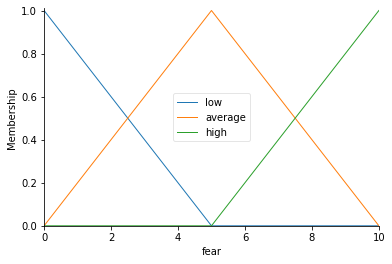

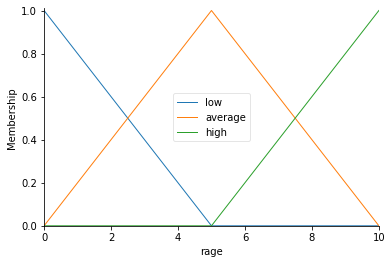

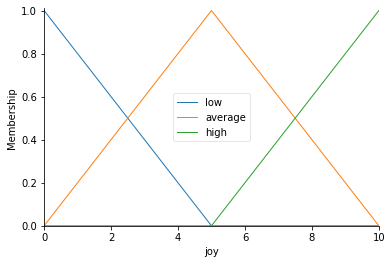

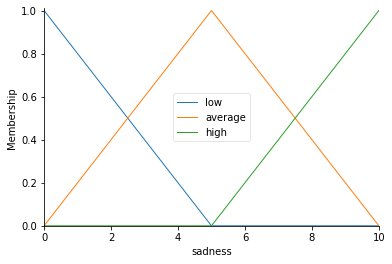

In [4]:
fear.view()
rage.view()
joy.view()
sadness.view()

In [5]:
# Definiendo la variable de salida tip y el rango que tomará (0 a 25)
volume = ctrl.Consequent(np.arange(0, 256, 1), 'volume')
pitch = ctrl.Consequent(np.arange(0, 256, 1), 'pitch')
velocity = ctrl.Consequent(np.arange(0, 256, 1), 'velocity')

In [6]:
# Definiendo la función de membresía para la variable de salida
volume['low'] = fuzz.trimf(volume.universe, [0, 0, 123])
volume['average'] = fuzz.trimf(volume.universe, [0, 123, 255])
volume['high'] = fuzz.trimf(volume.universe, [123, 255, 255])

pitch['low'] = fuzz.trimf(pitch.universe, [0, 0, 123])
pitch['average'] = fuzz.trimf(pitch.universe, [0, 123, 255])
pitch['high'] = fuzz.trimf(pitch.universe, [123, 255, 255])

velocity['low'] = fuzz.trimf(velocity.universe, [0, 0, 123])
velocity['average'] = fuzz.trimf(velocity.universe, [0, 123, 255])
velocity['high'] = fuzz.trimf(velocity.universe, [123, 255, 255])

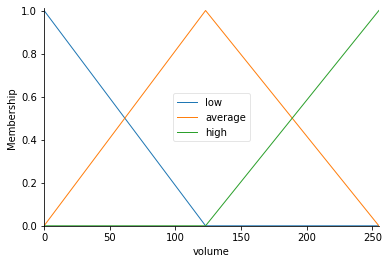

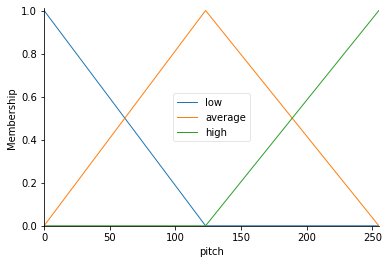

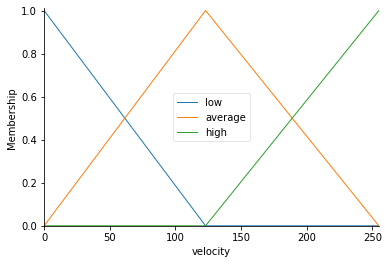

In [7]:
volume.view()
pitch.view()
velocity.view()

In [8]:
# Definiendo reglas de relación entre las variables de entrada y las de salida
r1 = ctrl.Rule(fear['low'], volume['average'])
r2 = ctrl.Rule(fear['low'], pitch['average'])
r3 = ctrl.Rule(fear['low'], velocity['average'])

r4 = ctrl.Rule(fear['average'], volume['average'])
r5 = ctrl.Rule(fear['average'], pitch['average'])
r6 = ctrl.Rule(fear['average'], velocity['average'])

r7 = ctrl.Rule(fear['high'], volume['high'])
r8 = ctrl.Rule(fear['high'], pitch['high'])
r9 = ctrl.Rule(fear['high'], velocity['high'])

In [9]:
r10 = ctrl.Rule(rage['low'], volume['average'])
r11 = ctrl.Rule(rage['low'], pitch['average'])
r12 = ctrl.Rule(rage['low'], velocity['average'])

r13 = ctrl.Rule(rage['average'], volume['high'])
r14 = ctrl.Rule(rage['average'], pitch['high'])
r15 = ctrl.Rule(rage['average'], velocity['high'])

r16 = ctrl.Rule(rage['high'], volume['high'])
r17 = ctrl.Rule(rage['high'], pitch['high'])
r18 = ctrl.Rule(rage['high'], velocity['high'])

In [10]:
r19 = ctrl.Rule(joy['low'], volume['low'])
r20 = ctrl.Rule(joy['low'], pitch['average'])
r21 = ctrl.Rule(joy['low'], velocity['average'])

r22 = ctrl.Rule(joy['average'], volume['average'])
r23 = ctrl.Rule(joy['average'], pitch['average'])
r24 = ctrl.Rule(joy['average'], velocity['average'])

r25 = ctrl.Rule(joy['high'], volume['high'])
r26 = ctrl.Rule(joy['high'], pitch['high'])
r27 = ctrl.Rule(joy['high'], velocity['average'])

In [11]:
r28 = ctrl.Rule(sadness['low'], volume['average'])
r29 = ctrl.Rule(sadness['low'], pitch['average'])
r30 = ctrl.Rule(sadness['low'], velocity['average'])

r31 = ctrl.Rule(sadness['average'], volume['average'])
r32 = ctrl.Rule(sadness['average'], pitch['low'])
r33 = ctrl.Rule(sadness['average'], velocity['low'])

r34 = ctrl.Rule(sadness['high'], volume['low'])
r35 = ctrl.Rule(sadness['high'], pitch['low'])
r36 = ctrl.Rule(sadness['high'], velocity['low'])

In [12]:
# Creando controlador difuso con las reglas especificadas anteriormente
# y creando una simulación
volume_ctrl = ctrl.ControlSystem([r1, r4, r7, r10, r13, r16, r19, r22, r25, r28, r31, r34])
pitch_ctrl = ctrl.ControlSystem([r2, r5, r8, r11, r14, r17, r20, r23, r26, r29, r32, r35])
velocity_ctrl = ctrl.ControlSystem([r3, r6, r9, r12, r15, r18, r21, r24, r27, r30, r33, r36])

vol = ctrl.ControlSystemSimulation(volume_ctrl)
pit = ctrl.ControlSystemSimulation(pitch_ctrl)
velo = ctrl.ControlSystemSimulation(velocity_ctrl)

In [13]:
# Valores de las varibles de entrada
input_fear = 3
input_rage = 0
inout_joy = 8
inout_sadness = 2

volumen: 141.7037214885957


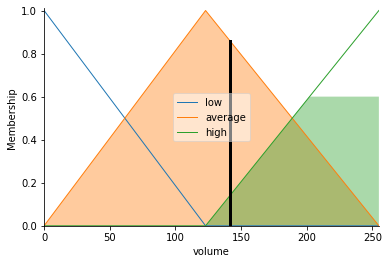

In [14]:
# Agregando valores de entrada e imprimiento resultado
vol.input['fear'] = input_fear
vol.input['rage'] = input_rage
vol.input['joy'] = inout_joy
vol.input['sadness'] = inout_sadness

vol.compute()
print("volumen: {0}".format(vol.output['volume']))
volume.view(sim=vol)

pitch: 133.9865877101842


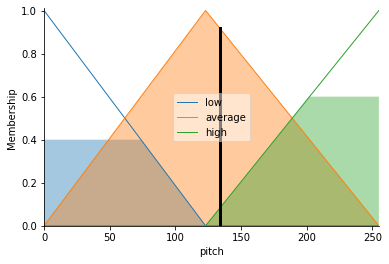

In [15]:
# Agregando valores de entrada e imprimiento resultado
pit.input['fear'] = input_fear
pit.input['rage'] = input_rage
pit.input['joy'] = inout_joy
pit.input['sadness'] = inout_sadness

pit.compute()
print("pitch: {0}".format(pit.output['pitch']))
pitch.view(sim=pit)

velocidad: 118.14716241734683


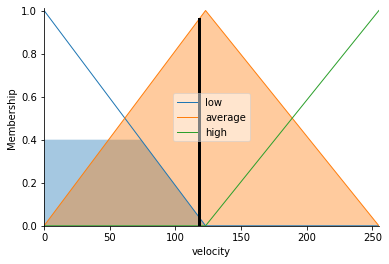

In [16]:
# Agregando valores de entrada e imprimiento resultadovelo.input['fear'] = input_fear
velo.input['rage'] = input_rage
velo.input['joy'] = inout_joy
velo.input['sadness'] = inout_sadness

velo.compute()
print("velocidad: {0}".format(velo.output['velocity']))
velocity.view(sim=velo)